In [5]:
# Import of required libs 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import warnings 
warnings.simplefilter('ignore')

In [6]:
# Load the dataset
pwd_data = pd.read_csv("datasets/DSL-StrongPasswordData.csv", header = 0)
pwd_data.head()

subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t     H.t  \
0    s002             1    1    0.1491       0.3979       0.2488  0.1069   
1    s002             1    2    0.1111       0.3451       0.2340  0.0694   
2    s002             1    3    0.1328       0.2072       0.0744  0.0731   
3    s002             1    4    0.1291       0.2515       0.1224  0.1059   
4    s002             1    5    0.1249       0.2317       0.1068  0.0895   

   DD.t.i  UD.t.i     H.i  ...     H.a  DD.a.n  UD.a.n     H.n  DD.n.l  \
0  0.1674  0.0605  0.1169  ...  0.1349  0.1484  0.0135  0.0932  0.3515   
1  0.1283  0.0589  0.0908  ...  0.1412  0.2558  0.1146  0.1146  0.2642   
2  0.1291  0.0560  0.0821  ...  0.1621  0.2332  0.0711  0.1172  0.2705   
3  0.2495  0.1436  0.1040  ...  0.1457  0.1629  0.0172  0.0866  0.2341   
4  0.1676  0.0781  0.0903  ...  0.1312  0.1582  0.0270  0.0884  0.2517   

   UD.n.l     H.l  DD.l.Return  UD.l.Return  H.Return  
0  0.2583  0.1338       0.3509       0.2171    0.0742  
1  0.1496  0.0839       0.2756       0.1917    0.0747  
2  0.1533  0.1085       0.2847       0.1762    0.0945  
3  0.1475  0.0845       0.3232       0.2387    0.0813  
4  0.1633  0.0903       0.2517       0.1614    0.0818  

[5 rows x 34 columns]

<Axes: title={'center': 'Average Keystroke Latency per Subject'}>

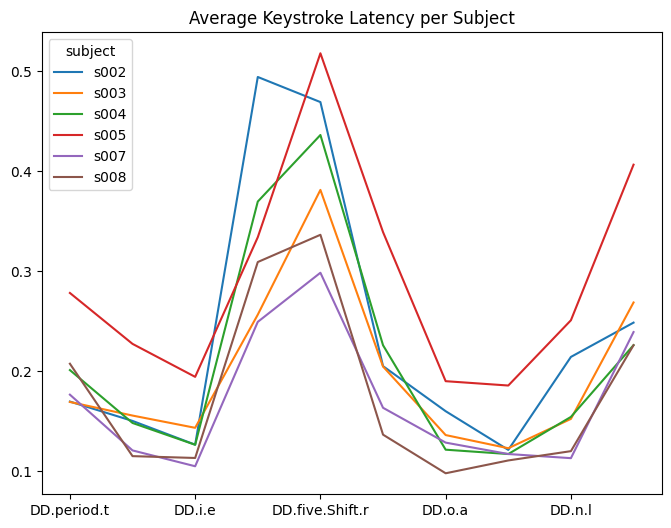

In [7]:
# Discover data: Average Keystroke Latency per Subject

DD = [dd for dd in pwd_data.columns if dd.startswith('DD')]
plot = pwd_data[DD]
plot['subject'] = pwd_data['subject'].values
plot = plot.groupby('subject').mean()

plot.iloc[:6].T.plot(figsize=(8, 6), title='Average Keystroke Latency per Subject')

In [8]:
# Divide data into train and test
data_train, data_test = train_test_split(pwd_data, test_size = 0.2, random_state=0)

X_train = data_train[pwd_data.columns[2:]]
y_train = data_train['subject']

X_test = data_test[pwd_data.columns[2:]]
y_test = data_test['subject']

In [11]:
# Train and predict with K-Nearest Neighbors Classifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

# Defining accuracy of prediction
knc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor Classifier Accuracy:', knc_accuracy)

K-Nearest Neighbor Classifier Accuracy: 0.3730392156862745


In [12]:
# Train & Evaluate a Linear SVM Classifier
svc = svm.SVC(kernel='linear') 
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Support Vector Linear Classifier Accuracy:', svc_accuracy)

Support Vector Linear Classifier Accuracy: 0.7629901960784313


In [13]:
# Train and predict with Multi-Layer Perceptron (MLP) Classifier
mlpc = MLPClassifier()
mlpc.fit(X_train,y_train)

y_pred = mlpc.predict(X_test)

mlpc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Multi Layer Perceptron Classifier Accuracy:', mlpc_accuracy)

Multi Layer Perceptron Classifier Accuracy: 0.9068627450980392


Text(0, 0.5, 'True')

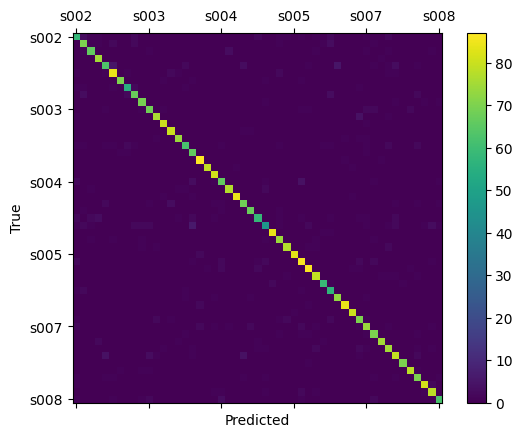

In [14]:
# Confusion Matrix for Classifier Evaluation
from sklearn.metrics import confusion_matrix

labels = list(pwd_data['subject'].unique())
cm = confusion_matrix(y_test, y_pred) 

figure = plt.figure()
axes = figure.add_subplot(111)
figure.colorbar(axes.matshow(cm))
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [15]:
# Separate all data for subject 's004'
s004_data = pwd_data[pwd_data['subject'] == 's004']

# Remove 's004' from the main dataset
filtered_data = pwd_data[pwd_data['subject'] != 's004']

# Split the filtered dataset (without s004) into training and testing sets
X = filtered_data[pwd_data.columns[2:]]
y = filtered_data['subject']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# Train a classifier (MLP) on the data without s004
mlpc = MLPClassifier(random_state=0)
mlpc.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [17]:
# Now test the model using s004 data
X_s004 = s004_data[pwd_data.columns[2:]]
y_s004 = s004_data['subject']
y_s004_pred = mlpc.predict(X_s004)

In [18]:
# Evaluate prediction performance on s004
s004_prediction_results = pd.DataFrame({
    "True Label": y_s004,
    "Predicted Label": y_s004_pred
})

s004_accuracy = metrics.accuracy_score(y_s004, y_s004_pred)
s004_prediction_results.head(10), s004_accuracy

(    True Label Predicted Label
 800       s004            s002
 801       s004            s016
 802       s004            s034
 803       s004            s002
 804       s004            s002
 805       s004            s031
 806       s004            s027
 807       s004            s002
 808       s004            s002
 809       s004            s034,
 0.0)

So, trained model is not detect excluded subjuct.
The model completely failed to correctly classify any instance of s004 after being trained on other subjects.
This is expected — the classifier has never seen any examples of s004 before and tries to classify them as one of the known classes.